## Dependencies

In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

#To display all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Reflect Tables into SQLAlchemy ORM

In [57]:
#Create an engine to the hawaii.sqlite database
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=True) 

###############################################################
#ONLY FOR THE UOT EVALUATOR                                   #
#PLEASE NOTE THAT I CHANGED THE EXISTING DIRECTORY STRUCTURE  #
#A BIT TO MATCH MY USUAL GITHUB DIRECTORY STRUCTURE           #
#If you are using the one in gitlab, please use               #
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")  #
###############################################################

#To view the sqlite table info
#engine.execute('SELECT * FROM sqlite_master').fetchall()
#'measurement' and 'station'

In [58]:
#Create an inspector and for engine (Not necessary, but, I prefer to view cleaner outputs for understanding metadata)
Inspector = inspect(engine)

2020-07-20 13:26:09,981 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-07-20 13:26:09,983 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:09,987 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-07-20 13:26:09,988 INFO sqlalchemy.engine.base.Engine ()


In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#To display table info
#The below commands or the inspector
#Base.metadata.tables
#'measurement' and 'station'
#To display schema for a Class (mapped table)
#Base.classes.measurement.__dict__
#Base.classes.station.__dict__

#To display table info(A cleaner output using inspector)
[[f"Table name : {table}"]+[f"{col['name']} : {col['type']}{' (primary_key)' if col['primary_key']==1 else None}" \
                            for col in Inspector.get_columns(table)] for table in Inspector.get_table_names()]



2020-07-20 13:26:10,648 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-07-20 13:26:10,652 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:10,655 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("measurement")
2020-07-20 13:26:10,656 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:10,660 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2020-07-20 13:26:10,662 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:10,664 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("measurement")
2020-07-20 13:26:10,665 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:10,667 INFO sqlalchemy.engine.base.Engine PRAGMA temp.foreign_key_list("measurement")
2020-07-20 13:26:10,668 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:26:10,670 INFO sqlalchemy.engine.base.Engine SELECT s

[['Table name : measurement',
  'id : INTEGER (primary_key)',
  'station : TEXTNone',
  'date : TEXTNone',
  'prcp : FLOATNone',
  'tobs : FLOATNone'],
 ['Table name : station',
  'id : INTEGER (primary_key)',
  'station : TEXTNone',
  'name : TEXTNone',
  'latitude : FLOATNone',
  'longitude : FLOATNone',
  'elevation : FLOATNone']]

In [60]:
# We can view all of the classes that automap found
[Class.__dict__ for Class in Base.classes]

[mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
               '__module__': 'sqlalchemy.ext.automap',
               '__doc__': None,
               '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 11db7c630>,
               '__init__': <function __init__(self, **kwargs)>,
               'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x11cccd8b0>,
               'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x11cccdd10>,
               'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x11dd9e7c0>,
               'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x11dd9ef90>,
               'tobs': <sqlalc

In [61]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

## Exploration of data in pandas

In [63]:
DF_measurement = pd.read_sql(session.query(Measurement).statement, session.bind)
DF_station = pd.read_sql(session.query(Station).statement, session.bind)

2020-07-20 13:31:33,352 INFO sqlalchemy.engine.base.Engine SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs 
FROM measurement
2020-07-20 13:31:33,354 INFO sqlalchemy.engine.base.Engine ()
2020-07-20 13:31:33,466 INFO sqlalchemy.engine.base.Engine SELECT station.id, station.station, station.name, station.latitude, station.longitude, station.elevation 
FROM station
2020-07-20 13:31:33,467 INFO sqlalchemy.engine.base.Engine ()


In [263]:
DF_measurement.head()
DF_measurement['date'] = DF_measurement['date'].map(lambda x:dt.datetime.strptime(x,"%Y-%m-%d"))
DF_station.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [273]:
DF_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       19550 non-null  int64         
 1   station  19550 non-null  object        
 2   date     19550 non-null  datetime64[ns]
 3   prcp     18103 non-null  float64       
 4   tobs     19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 763.8+ KB


In [268]:
DF_measurement[DF_measurement['date']>=dt.datetime.strptime('2016-08-23', "%Y-%m-%d")]

,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Climate Analysis

2020-07-20 17:05:21,465 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2020-07-20 17:05:21,468 INFO sqlalchemy.engine.base.Engine (1, 0)
2020-07-20 17:05:21,476 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ? ORDER BY measurement.date
2020-07-20 17:05:21,477 INFO sqlalchemy.engine.base.Engine ('2016-08-22 00:00:00.000000',)


Text(0, 0.5, 'Inches')

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


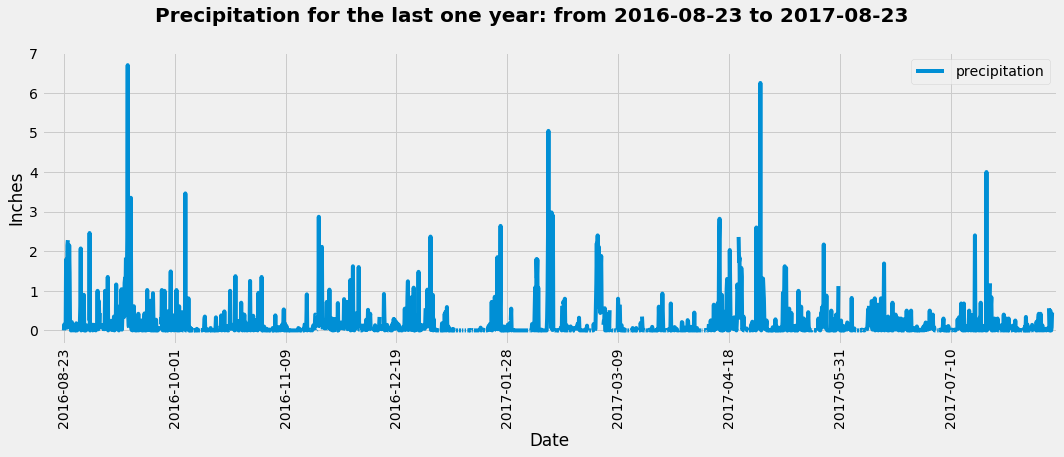

In [261]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results


### Calculate the date 1 year ago from the last data point in the database
#start date:- '2010-01-01'
#last date:- '2017-08-23'
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).scalar()

### Last one year mark in the dataset
One_year_mark = dt.datetime.strptime(last_date, "%Y-%m-%d")-dt.timedelta(days=366)

### Perform a query to retrieve the data and precipitation scores
#sql alchemy understands the DateTime dtype and converts that to string implicitly!!
last_one_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(
    (Measurement.date >= One_year_mark)).order_by(Measurement.date).all()

### Save the query results as a Pandas DataFrame and set the index to the date column
last_one_year_prcp_DF = pd.DataFrame(last_one_year_prcp, columns=['Date','precipitation'])
last_one_year_prcp_DF.set_index('Date', inplace=True)
#There are 208 NUll prcp values

### Sort the dataframe by date (Though the data is sorted initially, creating DF from the data changes the order)
last_one_year_prcp_DF.sort_index(inplace=True)


### Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15,6))
_=last_one_year_prcp_DF.plot(ax=ax)

### Annotation and labelling
xticks = np.arange(0,len(last_one_year_prcp_DF)+1,250)
xticklabels = last_one_year_prcp_DF.index[xticks].to_list()
plt.ylabel("Inches")
_=plt.suptitle(f"Precipitation for the last one year: from {last_one_year_prcp_DF.index.min()} to {last_one_year_prcp_DF.index.max()}", fontsize=20, weight='bold', y=1.06)
_=plt.xlim((-50,len(last_one_year_prcp_DF)+10))
_=plt.xticks(xticks, xticklabels, rotation=90)
_=plt.tight_layout()
_= plt.savefig('../Images/Last_one_year_precipitation.png', bbox_inches = "tight" )

# Use Pandas to calcualte the summary statistics for the precipitation data
last_one_year_prcp_DF.describe()

# Station Analysis

In [272]:
# Design a query to show how many stations are available in this dataset?
#stations = session.query(func.distinct(Measurement.station)).all()
session.query(func.distinct(Measurement.station)).count()

2020-07-20 17:33:36,110 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT distinct(measurement.station) AS distinct_1 
FROM measurement) AS anon_1
2020-07-20 17:33:36,114 INFO sqlalchemy.engine.base.Engine ()


9

In [292]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pd.read_sql(session.query(Measurement.station, func.count(Measurement.station).label("Data Points(count)")).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).statement, session.bind)

#Which station has the highest number of observations?
#create a subquery
station_observation = session.query(Measurement.station.label("station"), func.count(Measurement.station).label("DataPoints")).\
group_by(Measurement.station).subquery()

most_active_station = session.query(station_observation.c.station).order_by(station_observation.c.DataPoints.desc()).limit(1).scalar()
most_active_station




2020-07-20 18:01:16,695 INFO sqlalchemy.engine.base.Engine SELECT measurement.station, count(measurement.station) AS "Data Points(count)" 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2020-07-20 18:01:16,696 INFO sqlalchemy.engine.base.Engine ()


,station,Data Points(count)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


2020-07-20 18:01:16,734 INFO sqlalchemy.engine.base.Engine SELECT anon_1.station AS anon_1_station 
FROM (SELECT measurement.station AS station, count(measurement.station) AS "DataPoints" 
FROM measurement GROUP BY measurement.station) AS anon_1 ORDER BY anon_1."DataPoints" DESC
 LIMIT ? OFFSET ?
2020-07-20 18:01:16,735 INFO sqlalchemy.engine.base.Engine (1, 0)


'USC00519281'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
